In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']

In [8]:
plt.rcParams['axes.unicode_minus'] = False

In [10]:
# 1. 读取数据
# 根据你的文件类型选择合适的读取方式
df = pd.read_csv('adsorption_co2.csv')  # CSV文件
# df = pd.read_excel('your_data.xlsx')  # Excel文件

In [11]:
# 2. 查看数据基本信息
print("数据形状:", df.shape)

数据形状: (1000, 24)


In [12]:
print("\n前5行数据:")


前5行数据:


In [13]:
print(df.head())

         name  _cell_length_a  _cell_length_b  _cell_length_c  \
0  hMOF-30983       16.992694        8.559649       15.455313   
1  hMOF-12046       19.077105       12.759394       19.076929   
2    hMOF-907       12.759401       12.759400       12.759393   
3  hMOF-30728        9.065218        8.597304        7.540329   
4  hMOF-28290       10.654550       16.109301        9.130313   

   _cell_angle_alpha  _cell_angle_beta  _cell_angle_gamma   lcd   pld  \
0          92.289439         87.142206          80.223444  4.75  3.75   
1          92.271260         90.078300          87.711291  6.25  4.75   
2          90.031564         89.981504          89.985155  9.25  7.75   
3          82.296522         89.996962          85.172810  6.25  5.25   
4          89.994060         89.999724          83.973206  6.75  6.25   

   void_fraction  ...  number_N  number_O  number_F  number_Cl  number_V  \
0       0.461963  ...        12        16         0         18         0   
1       0.539350  

In [14]:
print("\n数据信息:")
print(df.info())


数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   _cell_length_a      1000 non-null   float64
 2   _cell_length_b      1000 non-null   float64
 3   _cell_length_c      1000 non-null   float64
 4   _cell_angle_alpha   1000 non-null   float64
 5   _cell_angle_beta    1000 non-null   float64
 6   _cell_angle_gamma   1000 non-null   float64
 7   lcd                 1000 non-null   float64
 8   pld                 1000 non-null   float64
 9   void_fraction       1000 non-null   float64
 10  surface_area_m2g    1000 non-null   float64
 11  surface_area_m2cm3  1000 non-null   float64
 12  number_H            1000 non-null   int64  
 13  number_C            1000 non-null   int64  
 14  number_N            1000 non-null   int64  
 15  number_O            1000 non-null   int64  
 16  

In [15]:
print("\n数据描述:")
print(df.describe())


数据描述:
       _cell_length_a  _cell_length_b  _cell_length_c  _cell_angle_alpha  \
count     1000.000000     1000.000000     1000.000000        1000.000000   
mean        15.679236       16.429176       15.072652          89.144827   
std          5.300015        5.232987        4.992873           7.902232   
min          6.394984        6.394989        7.088929          45.842616   
25%         11.792241       12.759400       11.804365          89.971027   
50%         15.418522       15.944558       14.573379          89.997757   
75%         18.215407       19.077068       17.674520          90.030390   
max         42.795305       42.784841       42.784893         121.692170   

       _cell_angle_beta  _cell_angle_gamma         lcd          pld  \
count       1000.000000        1000.000000  1000.00000  1000.000000   
mean          89.150354          87.868444     9.21000     7.696398   
std            7.634773           9.819297     4.62311     4.643673   
min           59.241818 

In [16]:
print("\n缺失值统计:")
print(df.isnull().sum())


缺失值统计:
name                  0
_cell_length_a        0
_cell_length_b        0
_cell_length_c        0
_cell_angle_alpha     0
_cell_angle_beta      0
_cell_angle_gamma     0
lcd                   0
pld                   0
void_fraction         0
surface_area_m2g      0
surface_area_m2cm3    0
number_H              0
number_C              0
number_N              0
number_O              0
number_F              0
number_Cl             0
number_V              0
number_Cu             0
number_Zn             0
number_Br             0
number_Zr             0
adsorption            0
dtype: int64


In [15]:
# 3. 数据预处理

# 方法2: 用均值填充数值型列的缺失值
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

NameError: name 'df' is not defined

In [16]:
# 3.2 处理异常值(以数值型列为例,使用IQR方法)
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # 将异常值替换为边界值
    df[col] = df[col].clip(lower_bound, upper_bound)

NameError: name 'numeric_columns' is not defined

In [22]:
# 3.3 编码分类变量
# 假设'target'是目标变量列名,其他分类列需要编码
label_encoders = {}

In [11]:
for col in categorical_columns:
    if col != 'adsorption':  # 如果target不是分类变量,请修改此处
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

NameError: name 'categorical_columns' is not defined

In [24]:
# 3.4 特征和目标变量分离
# 假设最后一列是目标变量,请根据实际情况修改
X = df.iloc[:, :-1]  # 特征
y = df.iloc[:, -1]   # 目标变量

In [26]:
# 4. 划分训练集和测试集 (8:2)
# 检查是否可以使用分层采样
print("\n目标变量的类别分布:")
print(y.value_counts())


目标变量的类别分布:
adsorption
0.000000    38
5.018706    30
3.788710     1
1.055290     1
1.179070     1
            ..
1.335360     1
0.637202     1
1.226320     1
2.802430     1
1.896740     1
Name: count, Length: 934, dtype: int64


In [27]:
# 检查每个类别的样本数量
min_class_count = y.value_counts().min()
print(f"\n最少样本的类别数量: {min_class_count}")


最少样本的类别数量: 1


In [28]:
if min_class_count >= 2:
    print("使用分层采样(stratify)...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2,      # 测试集占20%
        random_state=42,    # 随机种子,保证结果可复现
        stratify=y          # 分层采样,保持类别比例
    )
else:
    print("目标变量中存在样本数少于2的类别,使用普通随机采样...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2,      # 测试集占20%
        random_state=42     # 随机种子,保证结果可复现
    )

目标变量中存在样本数少于2的类别,使用普通随机采样...


In [29]:
# 5. 特征标准化(对数值型特征)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# 6. 查看划分后的数据形状
print("\n" + "="*50)

In [31]:
print("数据划分结果:")
print("="*50)

数据划分结果:


In [32]:
print(f"训练集特征形状: {X_train_scaled.shape}")

训练集特征形状: (800, 23)


In [33]:
print(f"测试集特征形状: {X_test_scaled.shape}")

测试集特征形状: (200, 23)


In [34]:
print(f"训练集标签形状: {y_train.shape}")

训练集标签形状: (800,)


In [35]:
print(f"测试集标签形状: {y_test.shape}")

测试集标签形状: (200,)


In [36]:
print(f"\n训练集占比: {len(X_train)/len(X)*100:.1f}%")


训练集占比: 80.0%


In [37]:
print(f"测试集占比: {len(X_test)/len(X)*100:.1f}%")

测试集占比: 20.0%


Text(0, 0.5, '数量')

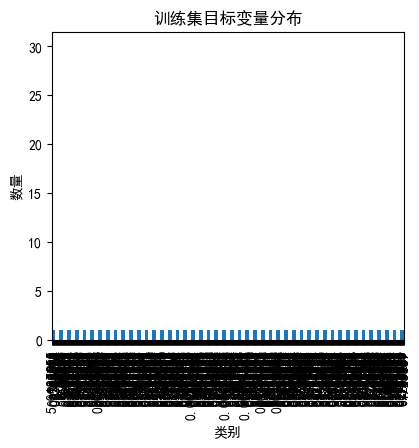

In [38]:
# 7. 可视化(可选)
# 查看目标变量分布
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar')
plt.title('训练集目标变量分布')
plt.xlabel('类别')
plt.ylabel('数量')

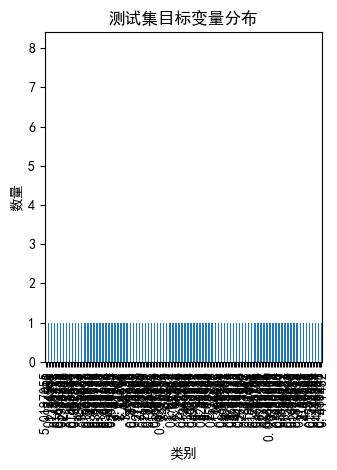


数据预处理完成!


In [39]:
plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar')
plt.title('测试集目标变量分布')
plt.xlabel('类别')
plt.ylabel('数量')
plt.tight_layout()
plt.show()

print("\n数据预处理完成!")

In [1]:
import xgboost as xgb

In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import numpy as np

In [7]:
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [9]:
print(dir()) 

['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__session__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'accuracy_score', 'classification_report', 'confusion_matrix', 'exit', 'get_ipython', 'mean_absolute_error', 'mean_squared_error', 'np', 'open', 'plt', 'quit', 'r2_score', 'sns', 'xgb']


In [10]:
print(y_train)

NameError: name 'y_train' is not defined